# Assignment 2 - MA3H0 Numerical Analysis and PDEs

### Student ID: 2110620 ###
Thomas Higham

We solve an elliptic boundary value problem with the help of a finite volume discretisation. Let $\Omega = (0, 1) \times (0, 1) \subset \mathbb{R}^2$. Use the notation $x = (x_1, x_2)$.

Consider the boundary value problem
$$\begin{cases}
-\Delta u(x) = f(x), & \quad x \in \Omega, \\
u(x) = 0, & \quad x \in \partial \Omega, \end{cases}$$

where $f(x)$ is a $C^1$ function of your choice. 

Let $(u_K)_{K \in \mathcal{T}}$ be the set of unknowns of the discrete problem. 

### Question 1:

Create a triangulation of $\Omega$, i.e create an admissible finite volume mesh $\mathcal{T}$ of $\Omega$ consisting of control volumes which are all triangles such that $0.1 \le \text{size}(\mathcal{T}) \le 0.2.$ The latter inequality gives you a lower and upper bound on how many triangles $\mathcal{T}$ can contain. Implement your mesh in a Jupiter notebook. Make a drawing of your mesh in a PDF.

#### Working:

$\text{Size}(\mathcal{T}) = \sup\{\text{diam}(K), K \in \mathcal{T}\}$. 
I can lower bound the number of triangles by the number of boxes of size $(0.2 \times 0.2)$ that can fill the domain $\Omega$ and the upper bound I'm not sure about.

Lower bound is 25.

I use pygmsh to generate my admissible mesh (see below). Then I test being able to access the triangles and points.

In [2]:
import pygmsh
import pyvista
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import pandas as pd
from IPython.display import HTML

/Users/thomashigham/opt/anaconda3/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/Users/thomashigham/opt/anaconda3/lib/python3.9/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


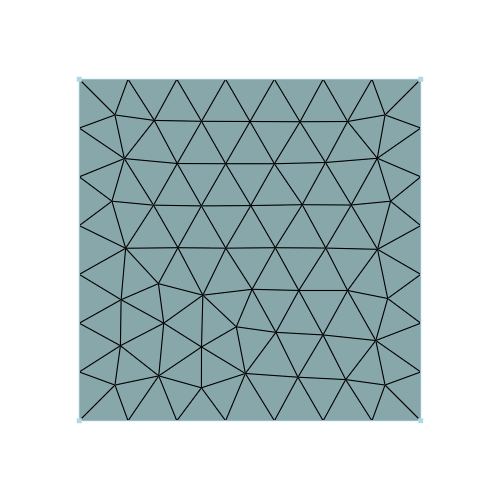

In [3]:
# Using pygmsh to generate a triangular mesh in the domain.
with pygmsh.geo.Geometry() as geom:
    geom.add_polygon(
        [
            [0.0, 0.0],
            [1.0, 0.0],
            [1.0, 1.0],
            [0.0, 1.0],
        ],
        mesh_size=0.15,
    )
    mesh = geom.generate_mesh()
    
# Plotting the mesh using pyvista.    
pyvista.set_plot_theme("document")

p = pyvista.Plotter(window_size=(500, 500))
p.add_mesh(
    mesh=pyvista.from_meshio(mesh),
    show_edges=True,
)
p.view_xy()
p.show()    

<meshio mesh object>
  Number of points: 75
  Number of cells:
    line: 28
    triangle: 120
    vertex: 4


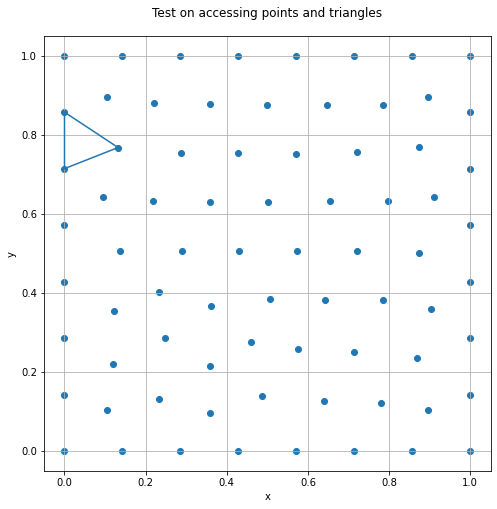

In [49]:
""" This cell contains some commented code on how to access the points and triangles from the mesh.
        Also I display a test plot to make sure I am accessing the data correctly.
"""

# Displaying information about the mesh.
print(mesh)
#print(mesh.cells[1].data) access triangle indices

#mesh.points[:,0:2] access all points.

X = np.array([[mesh.points[22,0]],[mesh.points[23,0]],[mesh.points[53,0]],[mesh.points[22,0]]]) 
Y = np.array([[mesh.points[22,1]],[mesh.points[23,1]], [mesh.points[53,1]], [mesh.points[22,1]]])
fig = plt.figure(figsize=(8,8))
plt.scatter(mesh.points[:,0:1] ,mesh.points[:,1:2])
plt.plot(X,Y)
plt.title("Test on accessing points and triangles", y = 1.03)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show() 

### Question 2

Let $(x_K)_{K \in \mathcal{T}}$ be a set of points, with each $x_K \in K$, i.e in the interior of the triangle. Compute

$$ f_K = \frac{1}{m(K)} \int_K f(x) dx$$

for all $K \in \mathcal{T}$. Here $m(K)$ denotes the area of triangle $K$. Make a choice how to approximate this integral in a simple way, using only the value $f(x_K)$ for an evaluation of $f(x)$. Implement this step in your Jupyter notebook.

### Method

$f_K$ gives the average function value in the triangle. So I can approximate $f_k$ by $f(x_k)$. This is a poor approximation but is simple.

In the below cell I also define my function for the assignment.

In [52]:
def func(x,y):
    
    return
def tricentre(points_arr):
    """ Calculating the centre point of a triangle
        Arguments:
                    points_arr - an array of three vertices of a triangle
        Returns:    
                    centre - the centre point as an array.
    """
    centre = np.zeros(1,1)
    centre[0] = (points_arr[0,0] + points_arr[1,0] + points_arr[2,0])/3 
    centre[1] = (points_arr[0,1] + points_arr[1,1] + points_arr[2,1])/3 
    return centre

def f_k(point, func):
    """ Approximation of f_k
        Arguments:
                    point - the point we evaluate at. 
                    func - the function we use to approximate
        Returns:
                    func(x,y) - an evaluation of func at point.                   
    """

    return func(x,y)

### Question 3

For the face (here line) $\sigma  = K/L$, with $\sigma \in \mathcal{E}_{\text{int}}$, i.e a face between two control volumes not at the boundary of $\Omega$, define
$$ F_{K, \sigma} = - \tau_{K|L}(u_L - u_K),$$

with $\tau_{K|L}$ is the "transmissibility" of the interface, given by $\tau_{K|L} = \frac{m(\sigma)}{d_\sigma}.$ Here $m(\sigma)$ is the length of the interface, and $d_\sigma$ is the Euclidian distance between $x_K$ and $x_L$. Implement $F_{K, \sigma}$ in your Jupyter notebook.

#### Method

**Check at end Thomas**

To implement interface lengths I will construct a function that takes two triangle objects and checks whether they have two vertices in common. If they do then I can compute the interface length using the norm between the two points.

In [55]:
def msigma(T_K, T_L):
    """ Computes the interface length msigma, if two triangles have a common edge.
        Arguments:
                    T_K - Triangle K, an array of three vertices.
                    T_L - Triangle L, an array of three vertices.
        Returns:
                    msigma - length of edge in common                   
    """    
    v1 = np.zeros(1,1)
    v2 = np.zeros(1,1)
    v3 = np.zeros(1,1)
    counter = 0
    msigma = 0
    
    # Checking T_K[0,:] against each vertex of T_L
    
    if T_K[0,:] == T_L[0,:] or T_K[0,:] == T_L[1,:] or T_K[0,:] == T_L[2,:]:
        counter += 1
        v1 = T_K[0,:]
    
    # Checking T_K[1,:] against each vertex of T_L
    
    if T_K[1,:] == T_L[0,:] or T_K[1,:] == T_L[1,:]or T_K[1,:] == T_L[2,:]:
        if counter == 0:
            v1 = T_K[1,:]
        else :
            v2 = T_K[1,:]
            
        counter += 1
        
    # Checking if two common vertices are present.    
    if counter ==2:
        msigma = np.norm(v1,v2)
        
    elif counter ==1:
        if T_K[2,:] == T_L[0,:] or T_K[2,:] == T_L[1,:]or T_K[2,:] == T_L[2,:]:
            v2 = T_K[2,:]
    elif counter == 0:
        msigma = nan
        
    return msigma

def tau_LK(T_K, T_L, msigma, tricentre):
    """ Computes the transmisibility of the interface
        Arguments:
                    T_K - Triangle K, an array of three vertices.
                    T_L - Triangle L, an array of three vertices.
                    msigma - function for interface length
                    tricentre - function for finding centre of triangle.
        Returns:
                    tau - transmisbility (scalar)               
    """        
    msig = msigma(x_K, x_L)
    d = np.norm(x_K - X_L)
    
    tau = msig / d
    
    return tau

def F_K_S(x_K, x_L, u_L, u_K, msigma, tau_LK):
    """ Computes the discretised approximation of the laplacian
        Arguments:
                    x_K - vector of central point of triangle K
                    x_L - vector of central point of triangle L
        Returns:
                    msigma - length of edge in common                   
    """    
    F = - tau_LK( x_K, x_L, msigma(x_K, x_L) ) * (u_L - u_K)
    
    return F

### Question 4

Implement all $F_{K, \sigma}$ at the boundary of $\Omega$ in your Jupyter notebook, i.e. set 
$$ F_{K, \sigma} = \tau_{\sigma} u_K,$$

for all $\sigma \in \mathcal{E}_{\text{ext}}$, i.e a face lying at the boundary of $\Omega$. Here $\tau_\sigma = \frac{m(\sigma)}{d_\sigma}$, with $m(\sigma)$ being the length of the boundary face, and $d_\sigma$ being the Euclidian disance between $x_K$ and $y_\sigma$.

### Question 5

The discrete problem now consists of solving the following system of linear equations:
$$
\begin{cases}
\Sigma_{\sigma \in \mathcal{E} } F_{K, \sigma} = m(K)f_K & x \in \Omega, \; \text{for all} \; K \in \mathcal{T},\\
f_{K, \sigma} = - F_{L, \sigma} & \text{for all} \; \sigma \in \mathcal{E}_{\text{int}}, \; \text{if} \; \sigma = K|L \\
F_{K, \sigma} = \tau_\sigma u_K, & \text{for all} \; \sigma \in \mathcal{E}_{\text{ext}}, \end{cases} $$